##FDI Analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV file
df_fdi = pd.read_csv('/content/drive/MyDrive/Internship_Unified_Mentor/Datasets/FDI data.csv')

# Inspect the columns
print("Columns in the DataFrame:", df_fdi.columns)

# Melt the DataFrame to long format
df_long = pd.melt(df_fdi, id_vars=['Sector'], var_name='Year', value_name='FDI Amount')

# Calculate key metrics
sector_total_fdi = df_long.groupby('Sector')['FDI Amount'].sum()
sector_avg_fdi = df_long.groupby('Sector')['FDI Amount'].mean()
year_total_fdi = df_long.groupby('Year')['FDI Amount'].sum()
year_avg_fdi = df_long.groupby('Year')['FDI Amount'].mean()
top_sector_fdi = sector_total_fdi.nlargest(1)
bottom_sector_fdi = sector_total_fdi.nsmallest(1)
trend_fdi = df_long.groupby('Year')['FDI Amount'].sum().reset_index()

# Print key metrics
print("Sector Total FDI:\n", sector_total_fdi)
print("Sector Average FDI:\n", sector_avg_fdi)
print("Top Sector by FDI:\n", top_sector_fdi)
print("Bottom Sector by FDI:\n", bottom_sector_fdi)
print("Year Total FDI:\n", year_total_fdi)
print("Year Average FDI:\n", year_avg_fdi)










print("The sector with the highest FDI is:", top_sector_fdi.index[0], "with an amount of", top_sector_fdi.values[0])
print("The sector with the lowest FDI is:", bottom_sector_fdi.index[0], "with an amount of", bottom_sector_fdi.values[0])


# Save the metrics and visualizations for further reporting
sector_total_fdi.to_csv('sector_total_fdi.csv')
sector_avg_fdi.to_csv('sector_avg_fdi.csv')
year_total_fdi.to_csv('year_total_fdi.csv')
year_avg_fdi.to_csv('year_avg_fdi.csv')
trend_fdi.to_csv('trend_fdi.csv')


Columns in the DataFrame: Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')
Sector Total FDI:
 Sector
AGRICULTURAL MACHINERY                     449.20
AGRICULTURE SERVICES                      1920.75
AIR TRANSPORT (INCLUDING AIR FREIGHT)     1014.44
AUTOMOBILE INDUSTRY                      16673.92
BOILERS AND STEAM GENERATING PLANTS        195.15
                                           ...   
TELECOMMUNICATIONS                       23946.01
TEXTILES (INCLUDING DYED,PRINTED)         2471.41
TIMBER PRODUCTS                            157.68
TRADING                                  14210.88
VEGETABLE OILS AND VANASPATI               697.50
Name: FDI Amount, Length: 63, dtype: float64
Sector Average FDI:
 Sector
AGRICULTURAL MACHINERY                     26.423529
AGRICULTURE SERVICES           

##Visualization

**Trends**

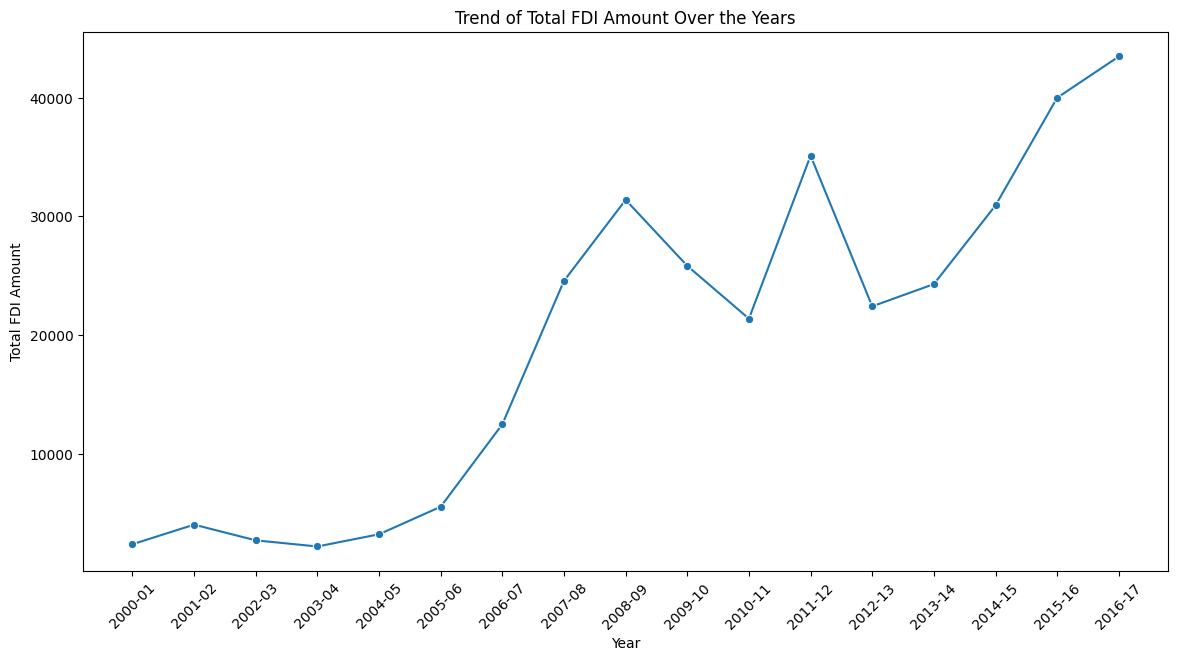

In [7]:
# Plotting the trends
plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_fdi, x='Year', y='FDI Amount', marker='o')
plt.title('Trend of Total FDI Amount Over the Years')
plt.xlabel('Year')
plt.ylabel('Total FDI Amount')
plt.xticks(rotation=45)
plt.show()



**Sector wise Total FDI**

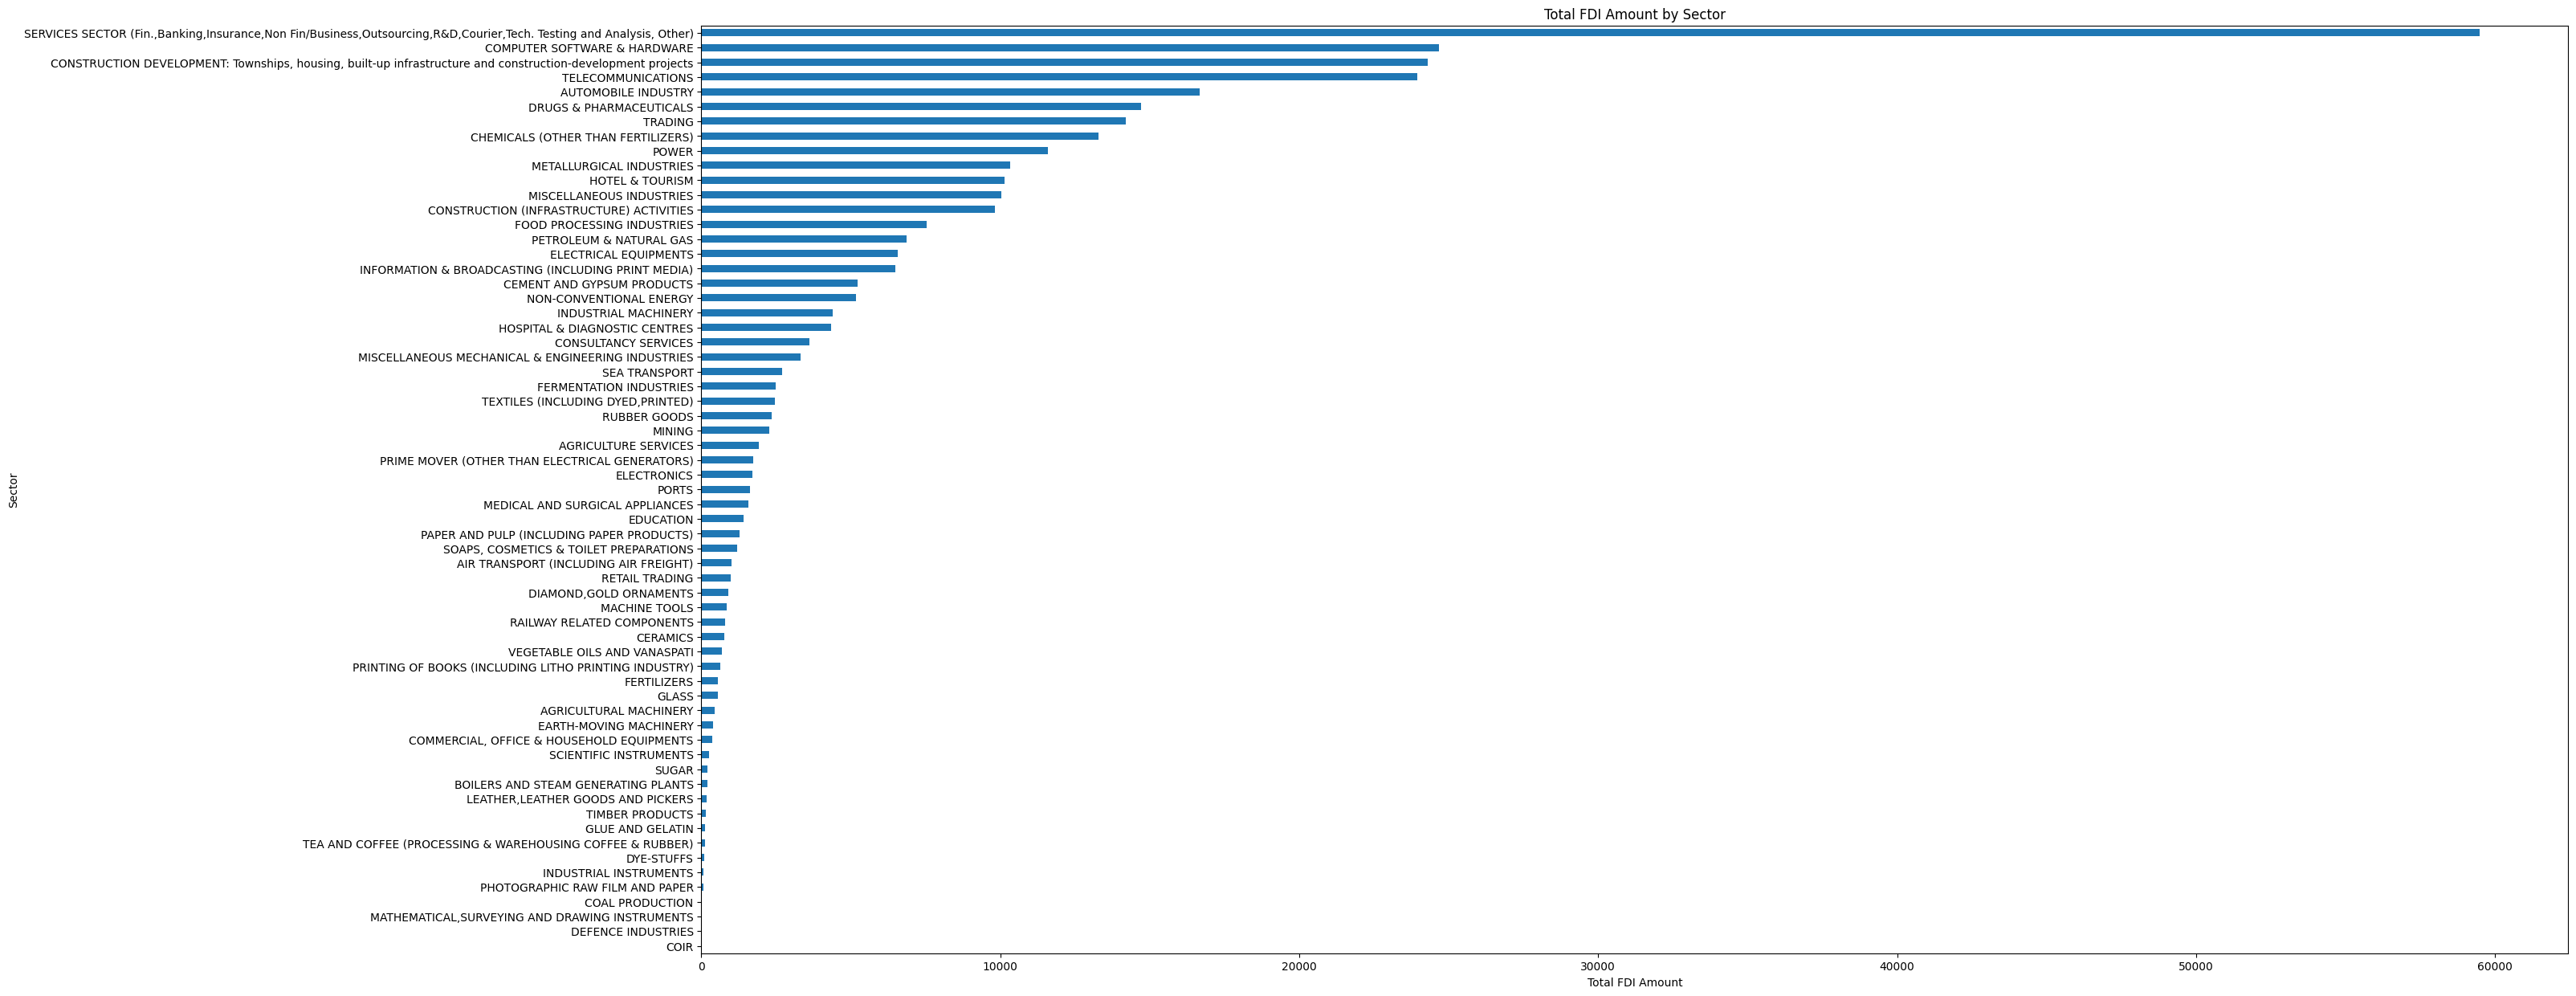

In [8]:
# Plotting sector-wise total FDI
plt.figure(figsize=(30, 15))
sector_total_fdi.sort_values().plot(kind='barh')
plt.title('Total FDI Amount by Sector')
plt.xlabel('Total FDI Amount')
plt.ylabel('Sector')
plt.show()

**Sector Wise Average FDI**

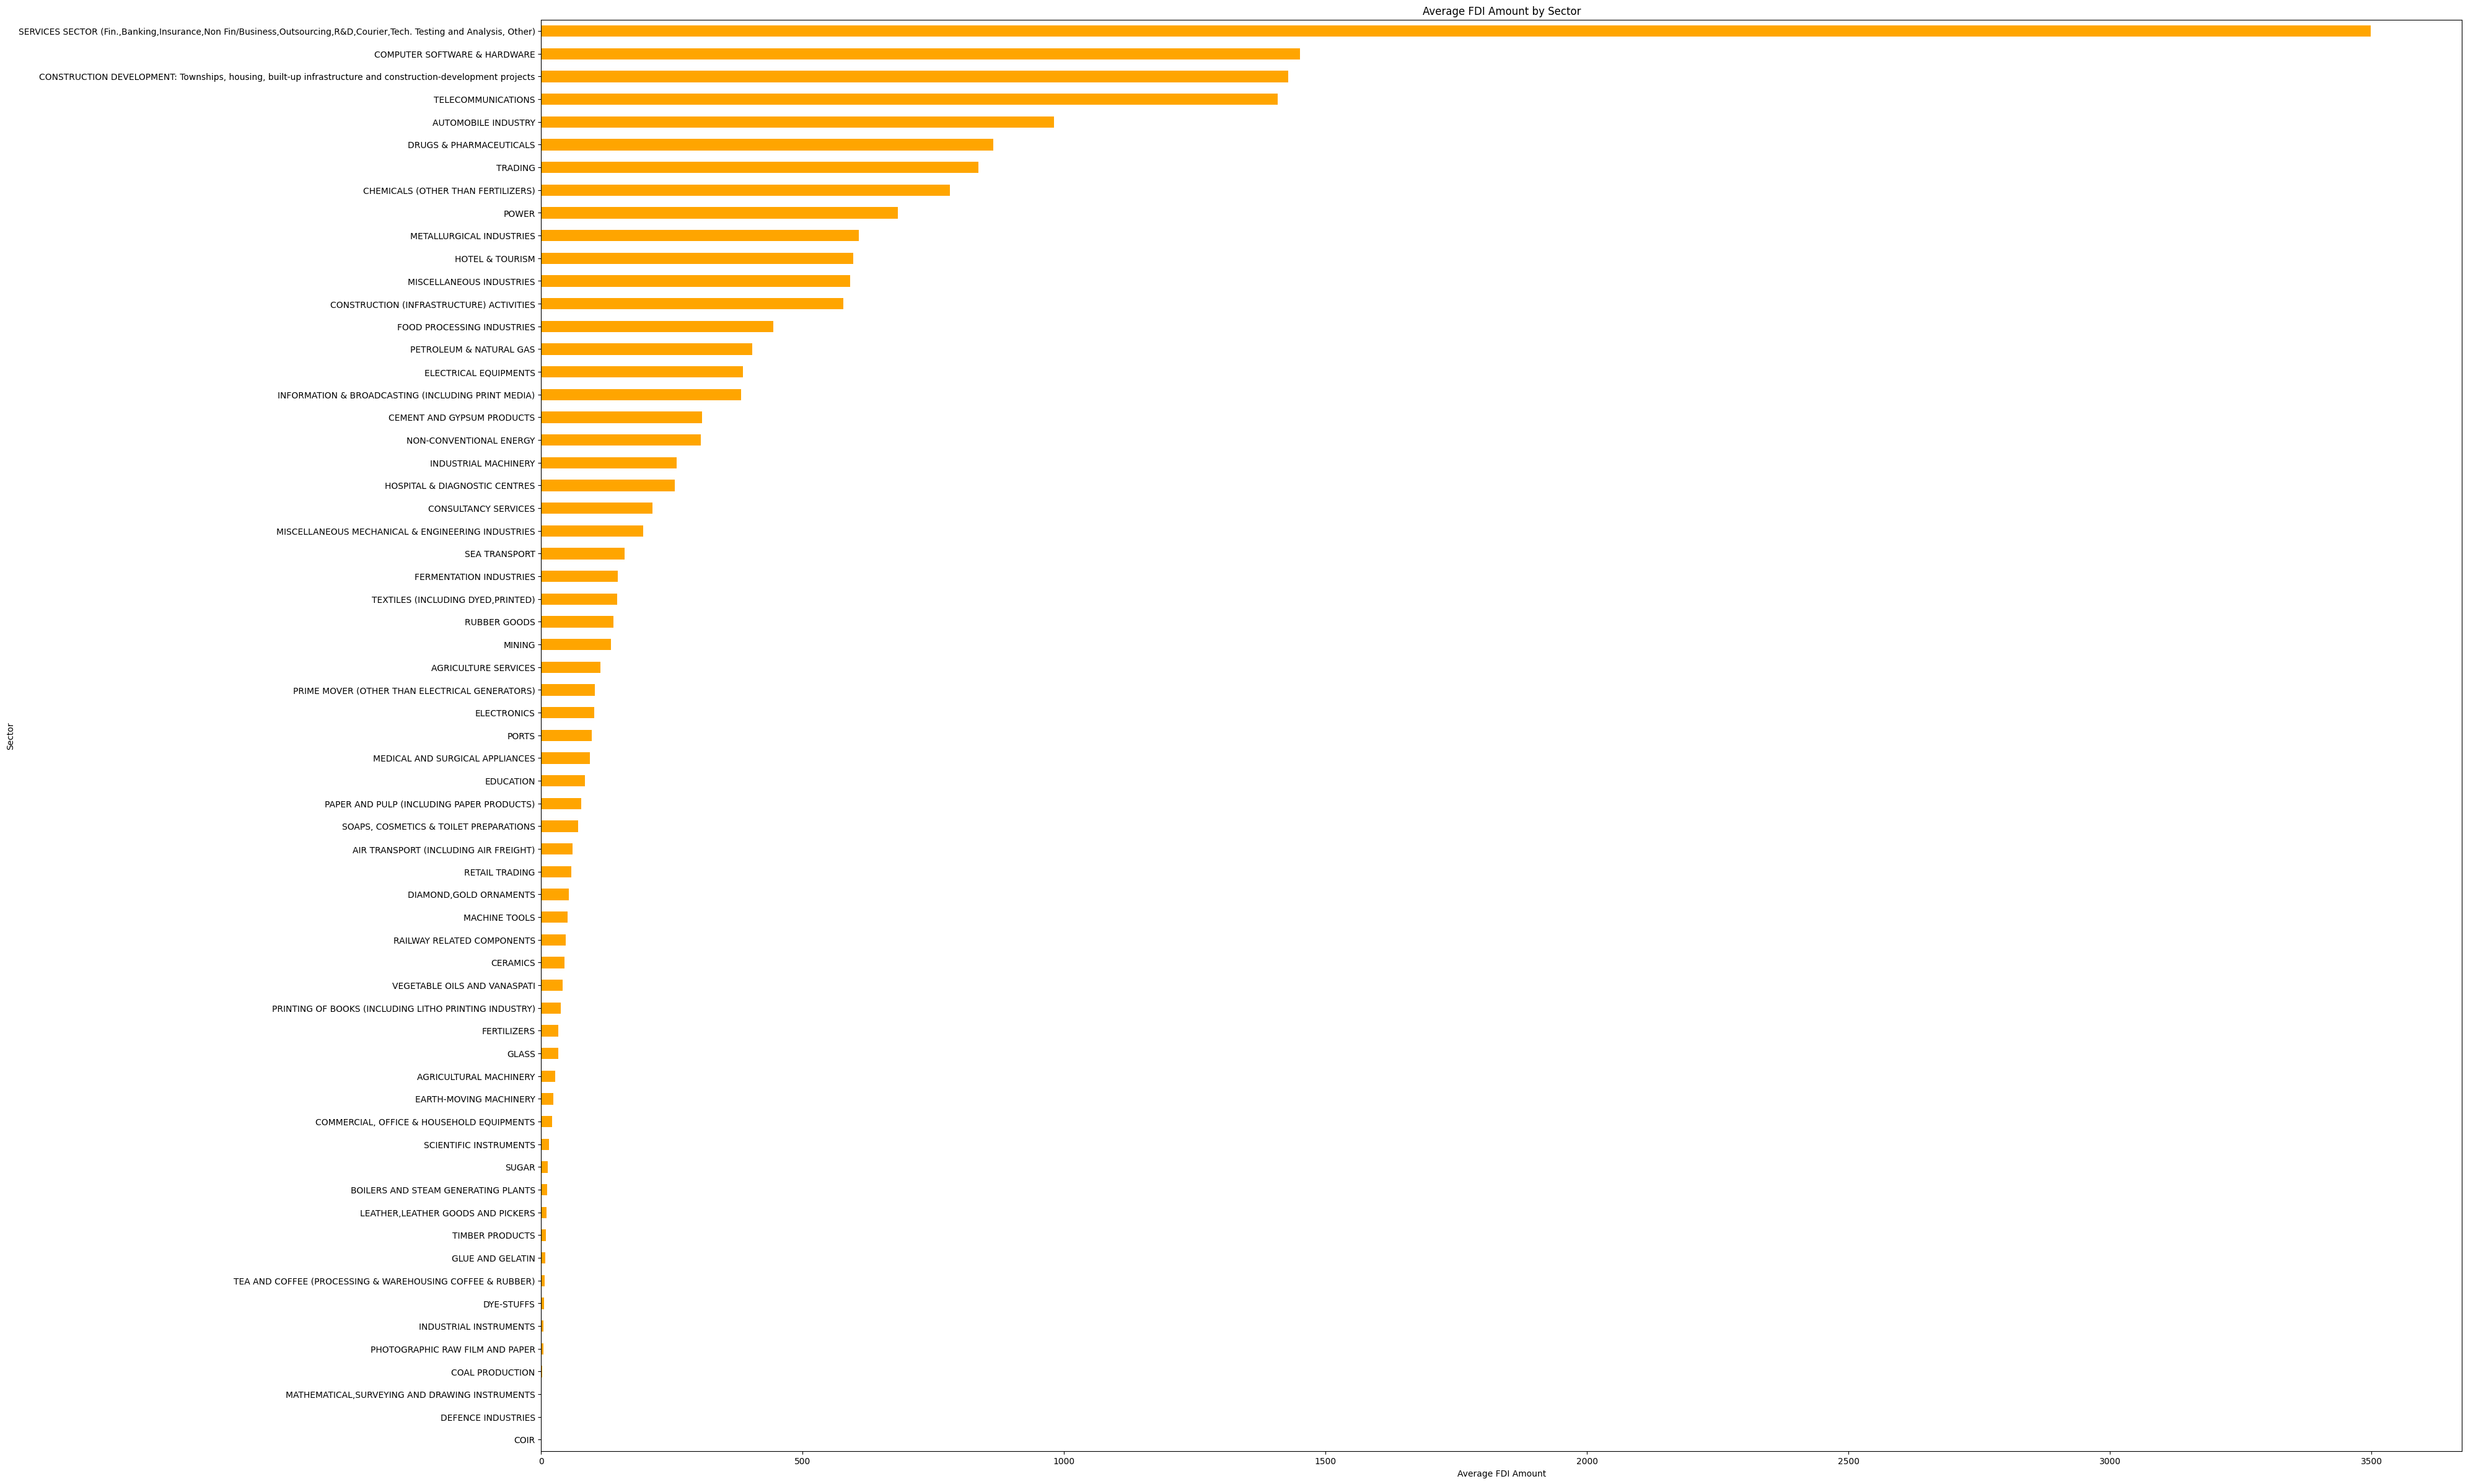

In [9]:
# Plotting sector-wise average FDI
plt.figure(figsize=(40, 30))
sector_avg_fdi.sort_values().plot(kind='barh', color='orange')
plt.title('Average FDI Amount by Sector')
plt.xlabel('Average FDI Amount')
plt.ylabel('Sector')
plt.show()

**Correlation Analysis**

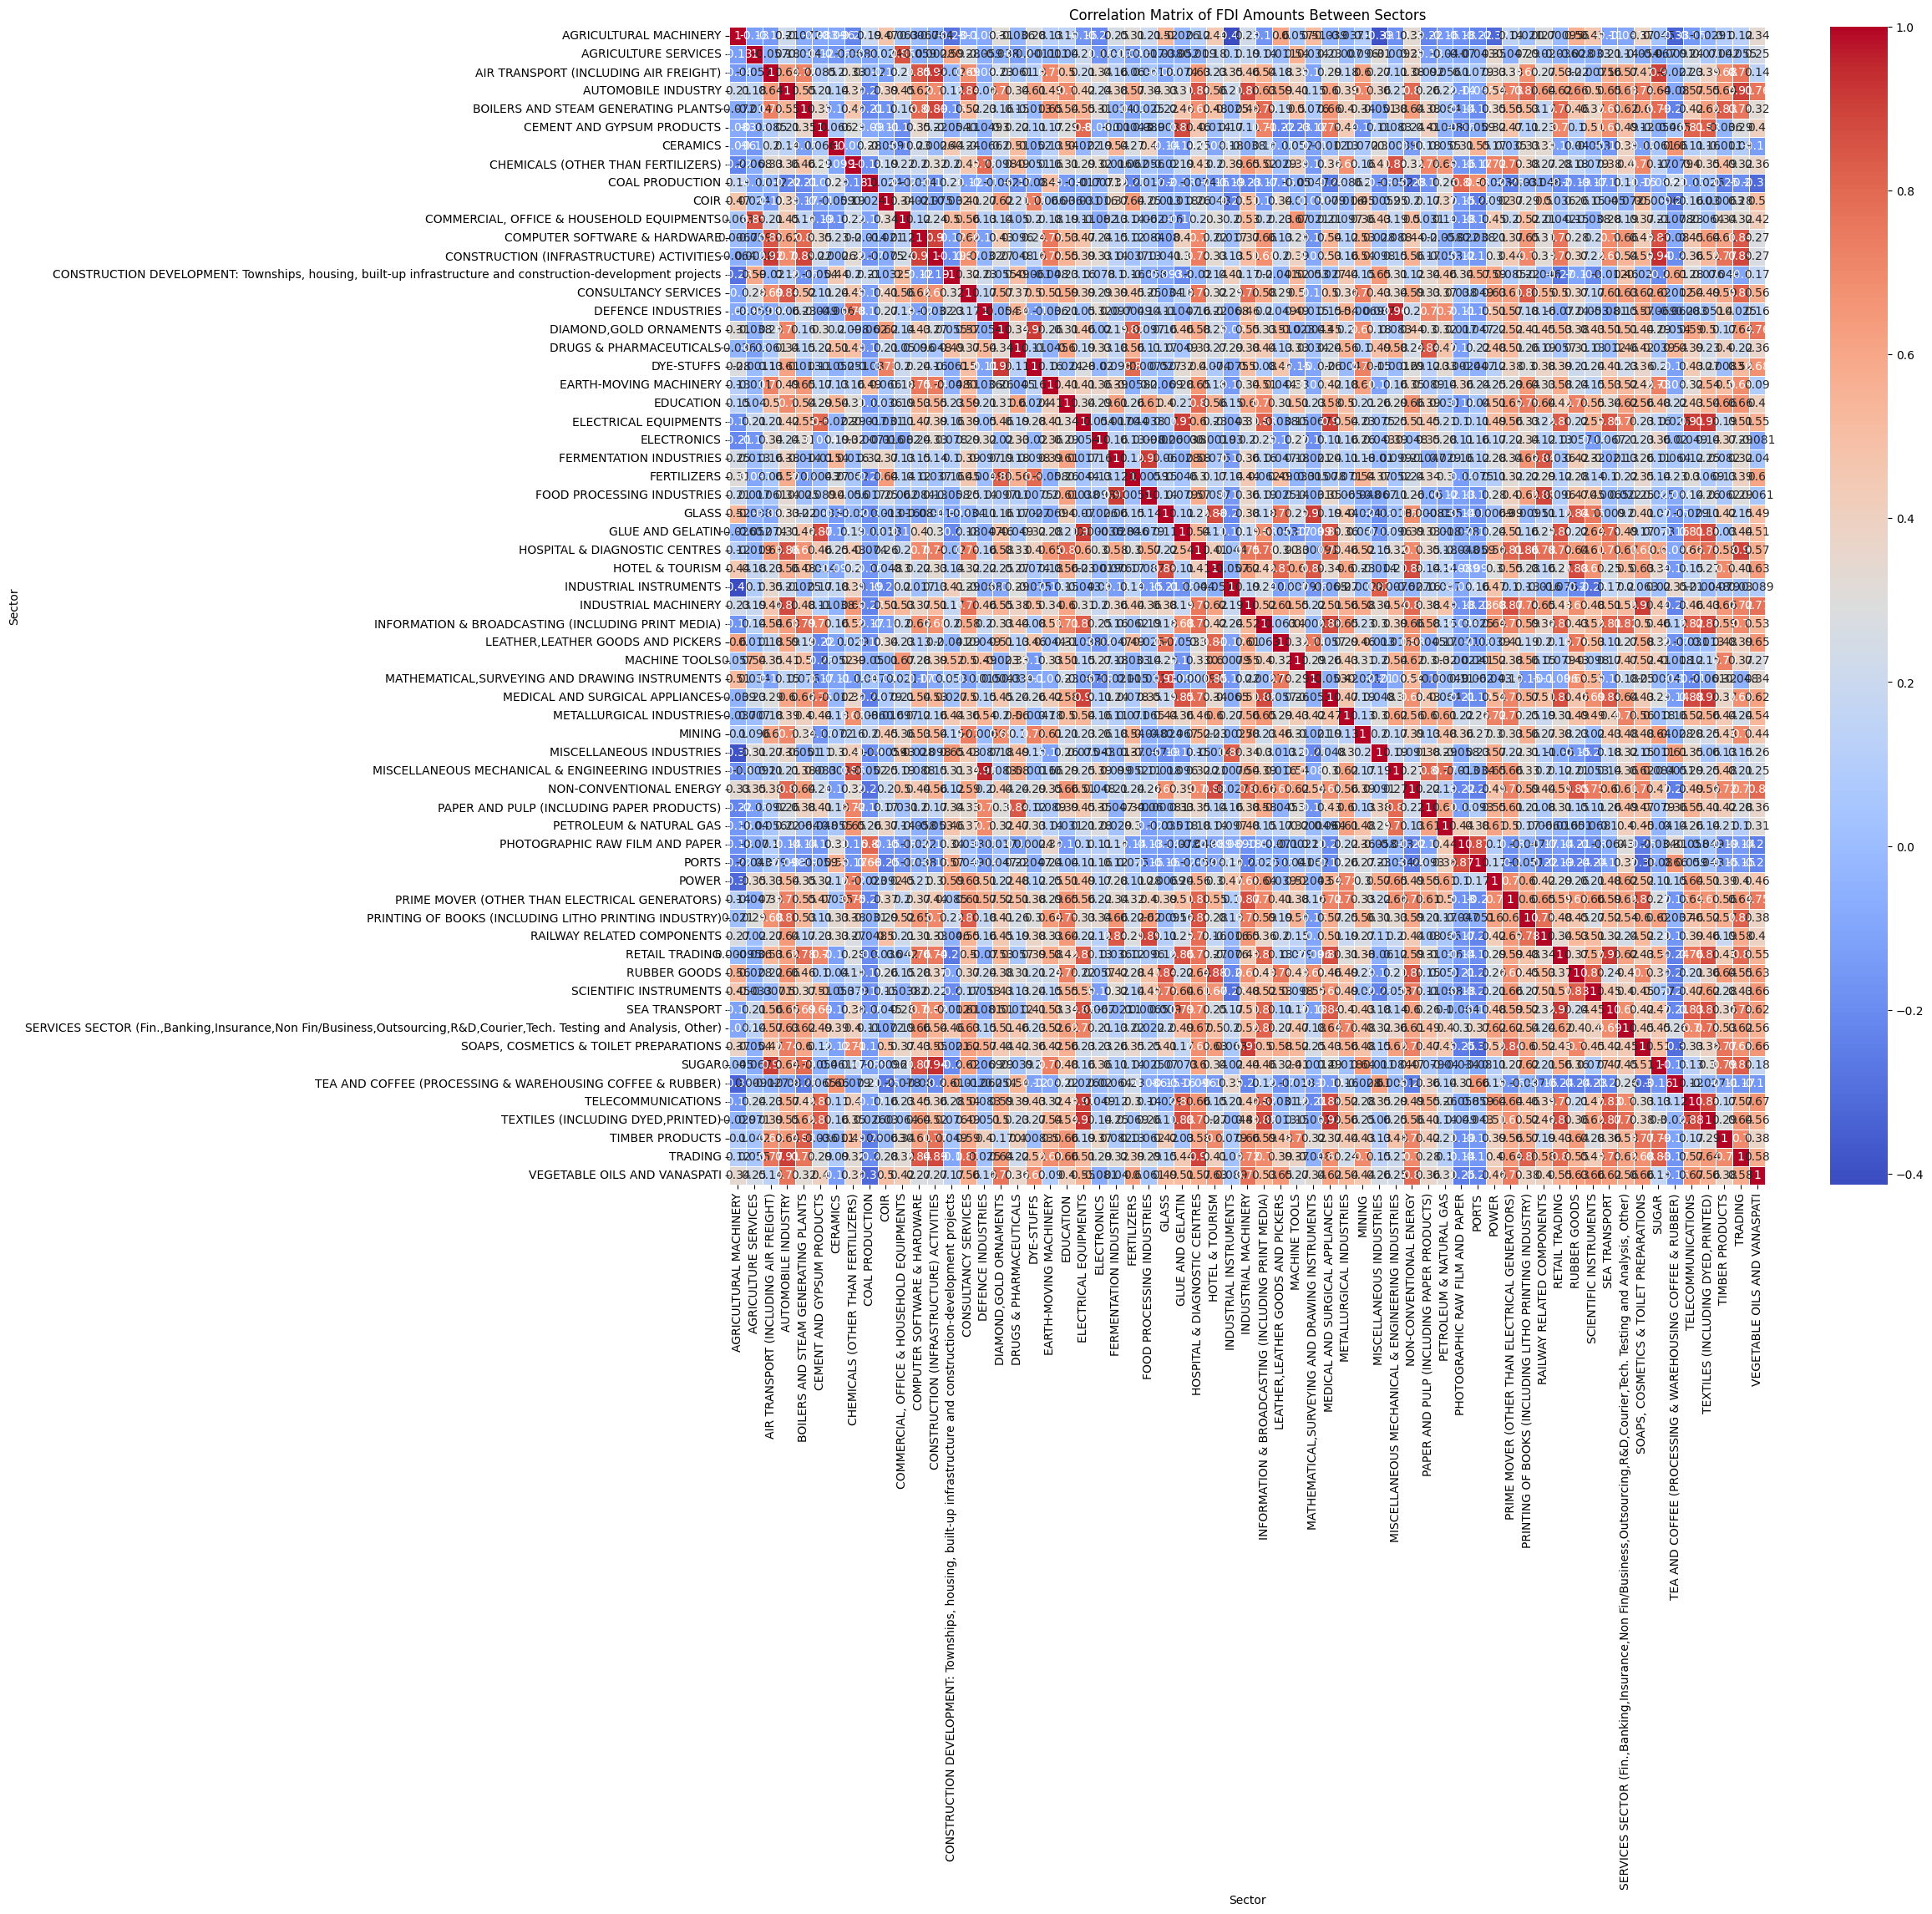

In [10]:
# Correlation analysis between sectors (assuming sector names are consistent over the years)
sector_year_fdi = df_long.pivot(index='Year', columns='Sector', values='FDI Amount')
correlation_matrix = sector_year_fdi.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of FDI Amounts Between Sectors')
plt.show()